In [1]:
##### This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/sample.csv.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv


# Data Loading

In [2]:
df = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv')
df.shape

(175000, 17)

In [3]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.0
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.0
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.0
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.0
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.0


# Exploratory Data Analysis

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Summary statistics
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,175000.000000,168923.000000,175000.000000,168923.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,168923.000000,168923.000000
mean,0.728377,1.357678,5.145930,1.518307,132.710349,132.701429,1.932143,6.127497,0.646816,0.979689,29.633901,2.246971,0.158825
std,0.445606,0.891283,394.971052,6.514678,76.148799,76.192493,1.948497,4.610834,2.328274,0.198775,25.425206,0.819216,0.511968
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-7.500000,0.000079,-29.300000,-1.000000,-576.750000,-2.500000,-1.750000
25%,0.000000,1.000000,1.080000,1.000000,67.000000,67.000000,0.000000,3.473321,0.000000,1.000000,16.300000,2.500000,0.000000
50%,1.000000,1.000000,1.840000,1.000000,133.000000,133.000000,1.000000,5.286217,0.000000,1.000000,21.450000,2.500000,0.000000
75%,1.000000,1.000000,3.610000,1.000000,199.000000,199.000000,2.500000,7.502746,0.000000,1.000000,31.800000,2.500000,0.000000
max,2.000000,9.000000,135182.060000,99.000000,264.000000,264.000000,11.750000,484.876151,80.000000,1.000000,587.250000,2.500000,1.750000


trip_distance and tip_amount has some outliers, look at mean, min, std and max value of these two columns.

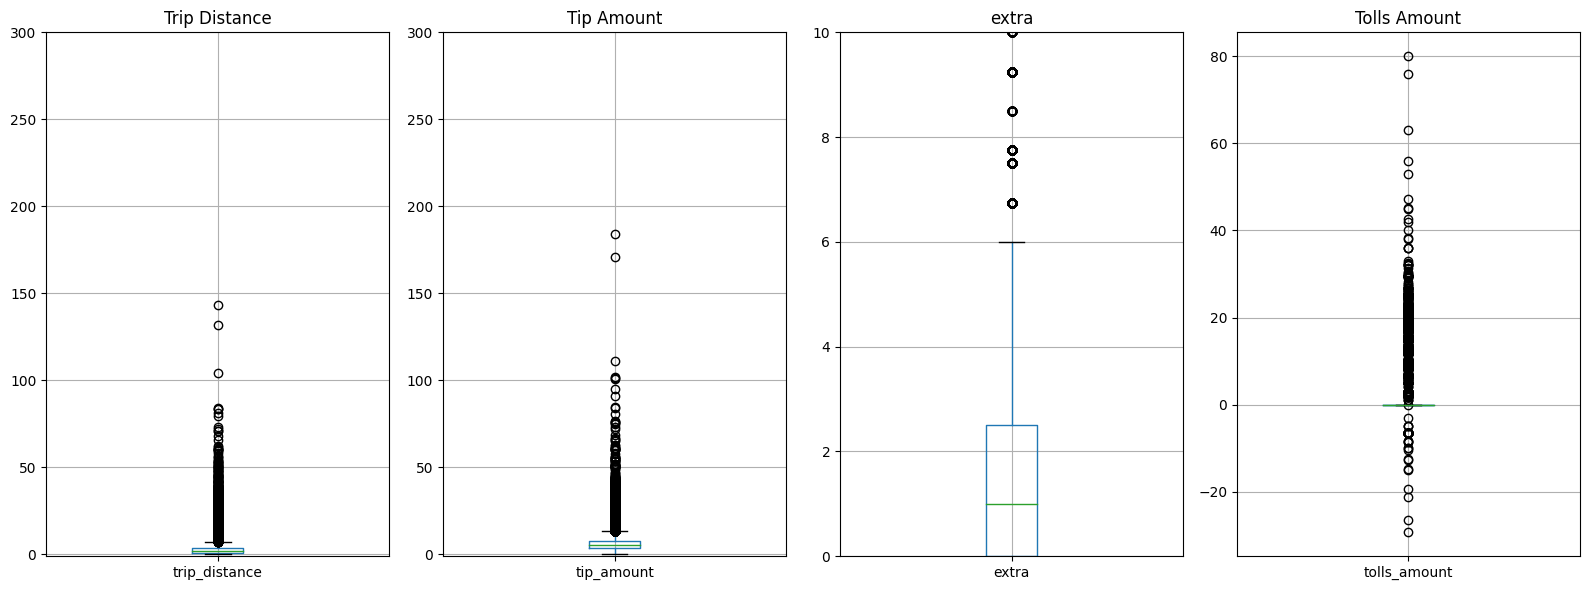

In [6]:
fig, ax = plt.subplots(1, 4, figsize=(16, 6))

df.boxplot(column='trip_distance', ax=ax[0])
ax[0].set_title('Trip Distance')
ax[0].set_ylim(-1, 300)

df.boxplot(column='tip_amount', ax=ax[1])
ax[1].set_title('Tip Amount')
ax[1].set_ylim(-1, 300)

df.boxplot(column='extra', ax=ax[2])
ax[2].set_title('extra')
ax[2].set_ylim(0, 10)

df.boxplot(column='tolls_amount', ax=ax[3])
ax[3].set_title('Tolls Amount')
# ax[3].set_ylim(-40, 100)

plt.tight_layout()
plt.show()

In [7]:
print("Number of rows before removing outliers:", len(df))
df = df[df['trip_distance'] < 100]
# df = df[df['tip_amount'] < 200]
# df = df[df['tolls_amount']<70]
# df = df[df['tolls_amount']>-20]
# df = df[(df['passenger_count'] != 9)]

# df.loc[df['trip_distance'] > 200, 'trip_distance'] = 3.68
# df.loc[df['passenger_count'] == 9, 'passenger_count'] = 1
# df['distance_per_passenger'] = df['trip_distance'] / df['passenger_count']
# df = df[(df['tolls_amount'] < 80) & (df['tolls_amount'] > -30)]
print("number of rows after removing outliers:", len(df))

Number of rows before removing outliers: 175000
number of rows after removing outliers: 174993


In [8]:
# Information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174993 entries, 0 to 174999
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               174993 non-null  int64  
 1   tpep_pickup_datetime   174993 non-null  object 
 2   tpep_dropoff_datetime  174993 non-null  object 
 3   passenger_count        168919 non-null  float64
 4   trip_distance          174993 non-null  float64
 5   RatecodeID             168919 non-null  float64
 6   store_and_fwd_flag     168919 non-null  object 
 7   PULocationID           174993 non-null  int64  
 8   DOLocationID           174993 non-null  int64  
 9   payment_type           174993 non-null  object 
 10  extra                  174993 non-null  float64
 11  tip_amount             174993 non-null  float64
 12  tolls_amount           174993 non-null  float64
 13  improvement_surcharge  174993 non-null  float64
 14  total_amount           174993 non-null  f

In [9]:
# Calculate the number of missing values in each column
df.isna().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          6074
trip_distance               0
RatecodeID               6074
store_and_fwd_flag       6074
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     6074
Airport_fee              6074
dtype: int64

Since there are 6074 null values, we simply can not drop the this much rows. I will impute it with suitable stratgey.

In [10]:
# Calculate duplicate rows
duplicates = df[df.duplicated()]
len(duplicates)

0

## Plots

In [11]:
df2 = df.copy(deep=True)

#### Countplots of congestion_surcharge, Airport_fee, RatecodeID, and passenger_count

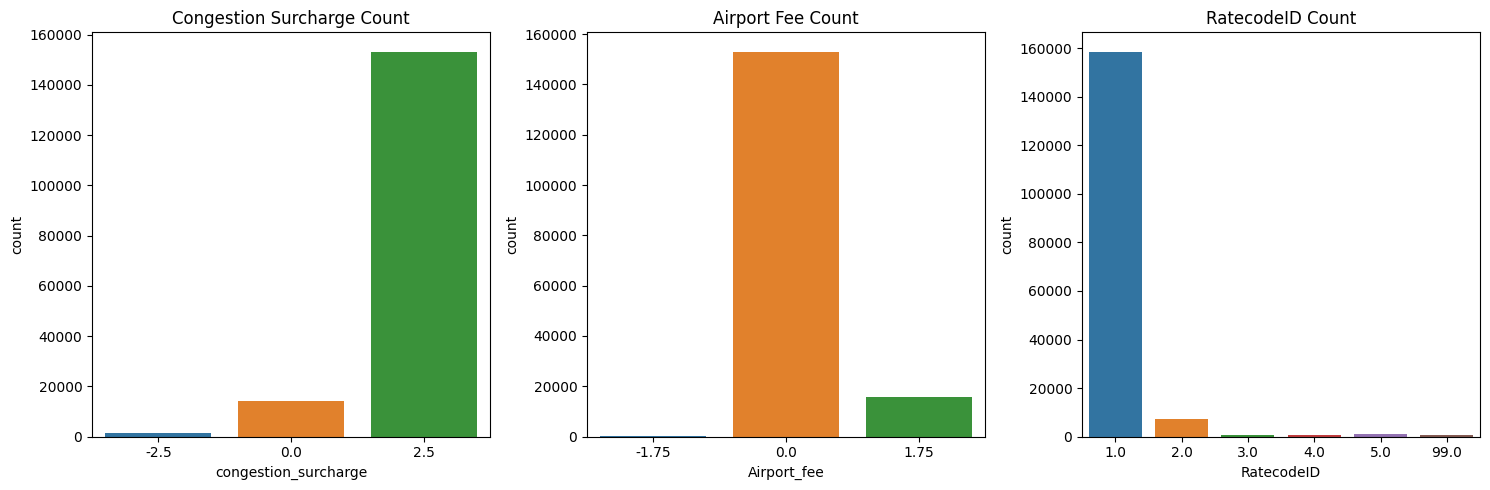

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

sns.countplot(x='congestion_surcharge', data=df2, ax=axes[0])
axes[0].set_title('Congestion Surcharge Count')

sns.countplot(x='Airport_fee', data=df2, ax=axes[1])
axes[1].set_title('Airport Fee Count')

sns.countplot(x='RatecodeID', data=df2, ax=axes[2])
axes[2].set_title('RatecodeID Count')

plt.tight_layout()
plt.show()

from above plot, we can colclude that these three fetaures are categorical columns. Imputaion of missing values for these columns will done with its mode value.

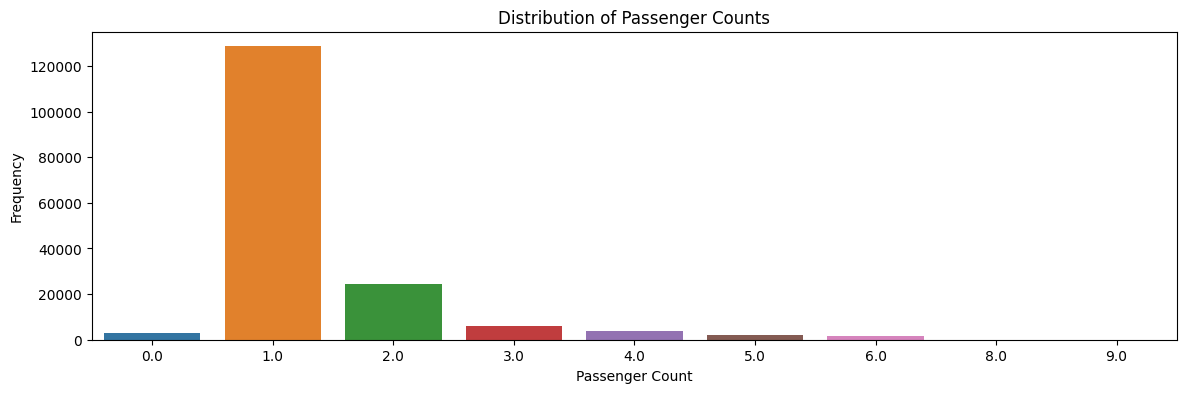

In [13]:
plt.figure(figsize=(14, 4))

sns.countplot(data=df2, x='passenger_count')

plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.title('Distribution of Passenger Counts')

plt.show()

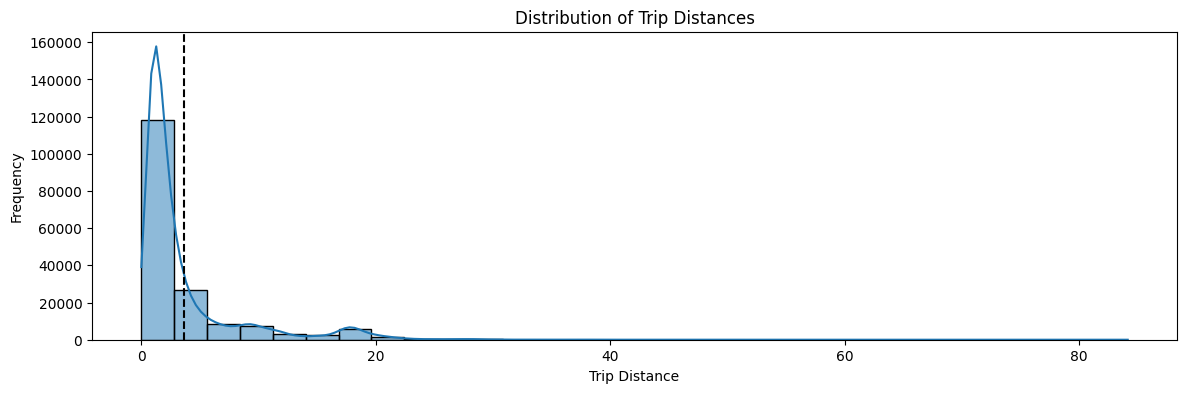

In [14]:
plt.figure(figsize=(14, 4))

sns.histplot(df2['trip_distance'], bins=30, kde=True)
plt.axvline(df2["trip_distance"].mean(),color = "k", linestyle = "dashed")

plt.xlabel('Trip Distance')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Distances')

plt.show()

trip_distacne is left skewed, will use StandardScalar to tranform it. more that 50% of data are below the average value.

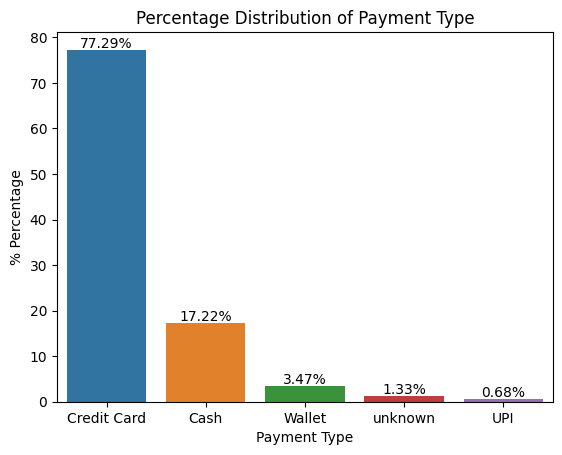

In [15]:
percentage_data = (df2['payment_type'].value_counts() / len(df2)) * 100

ax = sns.barplot(x=percentage_data.index, y=percentage_data.values)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.5, '{:.2f}%'.format(height), ha="center")

plt.title('Percentage Distribution of Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('% Percentage')

plt.show()

Majority of the customer used credit card for payment.

In [16]:
df2['tpep_pickup_datetime'] = pd.to_datetime(df2['tpep_pickup_datetime'])
df2['tpep_dropoff_datetime'] = pd.to_datetime(df2['tpep_dropoff_datetime'])

df2['pickup_hour'] = df2['tpep_pickup_datetime'].dt.hour
df2['pickup_weekday'] = df2['tpep_pickup_datetime'].dt.dayofweek
df2['pickup_hour2'] = df2['tpep_dropoff_datetime'].dt.hour
df2['pickup_weekday2'] = df2['tpep_dropoff_datetime'].dt.dayofweek

In [17]:
df2['trip_duration'] = (df2['tpep_dropoff_datetime'] - df2['tpep_pickup_datetime']).dt.seconds / 3600
df2['trip_duration']

0         23.240000
1         22.942778
2          0.894167
3          0.947778
4          0.313889
            ...    
174995    23.523611
174996     1.023333
174997     1.167222
174998    23.360556
174999     1.466389
Name: trip_duration, Length: 174993, dtype: float64

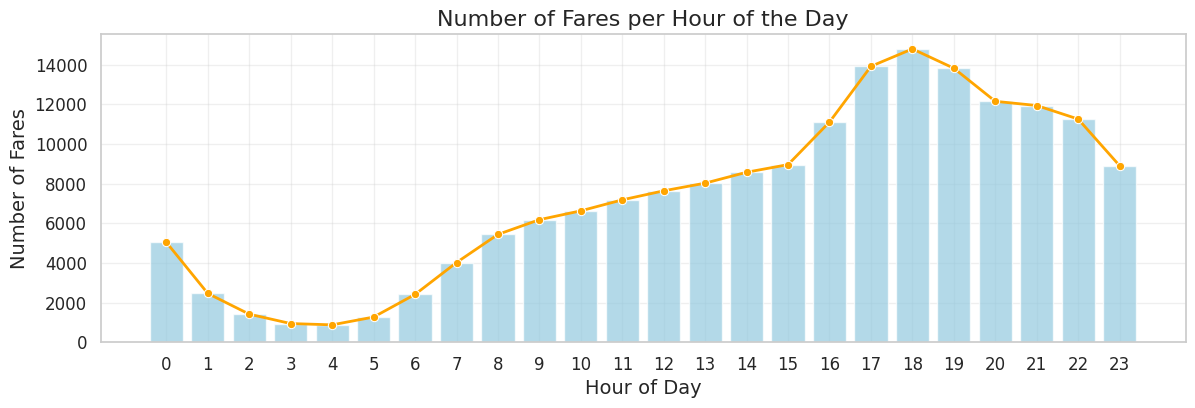

In [18]:
hourly_counts = df2.groupby('pickup_hour').size().reset_index(name='number_of_fares')

sns.set(style="whitegrid")
plt.figure(figsize=(14, 4))

sns.barplot(x='pickup_hour', y='number_of_fares', data=hourly_counts, color='skyblue', alpha=0.7)
sns.lineplot(x='pickup_hour', y='number_of_fares', data=hourly_counts, color='orange', marker='o', linewidth=2)

plt.title('Number of Fares per Hour of the Day', fontsize=16)
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Number of Fares', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, alpha=0.3)

plt.show()

4pm to 10pm in the evening seem to be the busiest hours of the day.

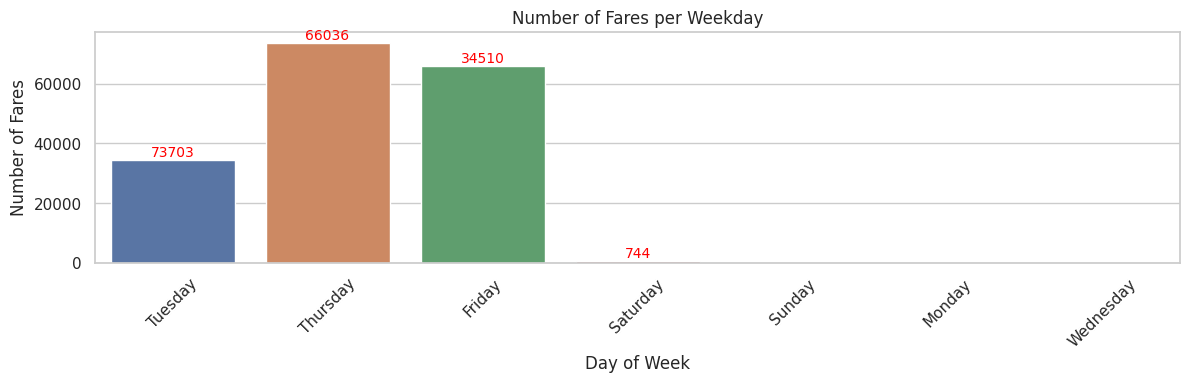

In [19]:
weekday_counts = df2['pickup_weekday'].value_counts().reset_index()
weekday_counts.columns = ['Day of Week', 'Number of Fares']

custom_mapping = {2: 'Tuesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday', 0: 'Monday', 1: 'Wednesday'}

# Map the numeric values to custom weekdays
weekday_counts['Day of Week'] = weekday_counts['Day of Week'].map(custom_mapping)

# Create the bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(14, 3))

ax = sns.barplot(x='Day of Week', y='Number of Fares', data=weekday_counts, order=list(custom_mapping.values()))
ax.bar_label(ax.containers[0], labels=weekday_counts['Number of Fares'], fontsize=10, color='red')

plt.xlabel('Day of Week')
plt.ylabel('Number of Fares')
plt.title('Number of Fares per Weekday')

plt.xticks(rotation=45)
plt.show()


Thursday and Friday are busier and saturday has the lowest number of fares.

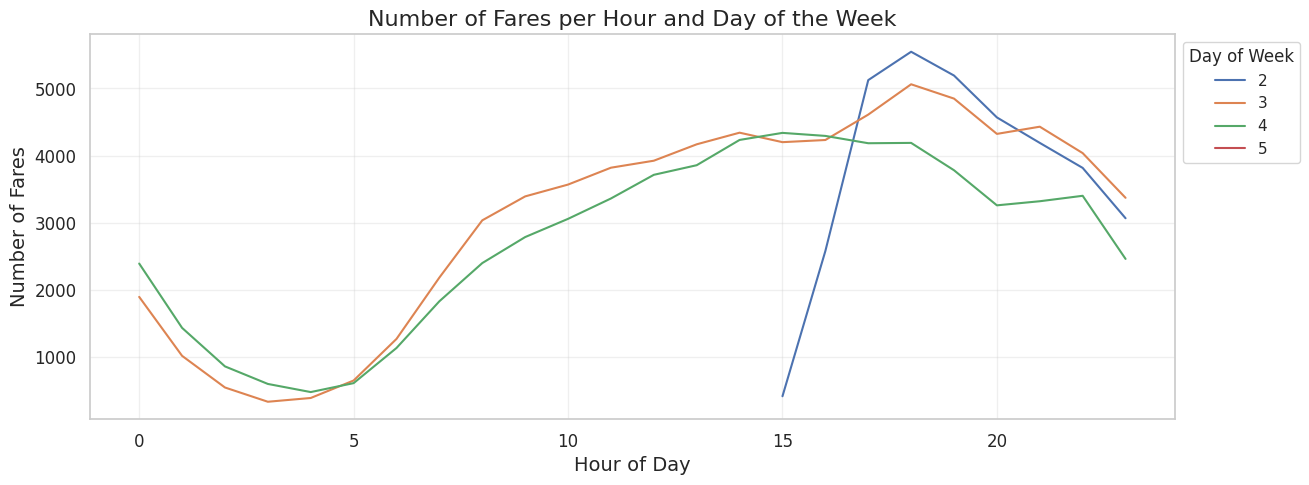

In [20]:
hourly_weekday_counts = df2.groupby(['pickup_hour', 'pickup_weekday']).size().reset_index(name='number_of_fares')
hourly_weekday_counts_pivot = hourly_weekday_counts.pivot(index='pickup_hour', columns='pickup_weekday', values='number_of_fares')

plt.figure(figsize=(14, 5))

for day in hourly_weekday_counts_pivot.columns:
    sns.lineplot(x=hourly_weekday_counts_pivot.index, y=hourly_weekday_counts_pivot[day], label=day)

plt.title('Number of Fares per Hour and Day of the Week', fontsize=16)
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Number of Fares', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Day of Week', bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(True, alpha=0.3)

plt.show()

Saturday is busier that other days in the evening.
Number of fares peaks from 4:00pm 8:00pm irrespective of the day.

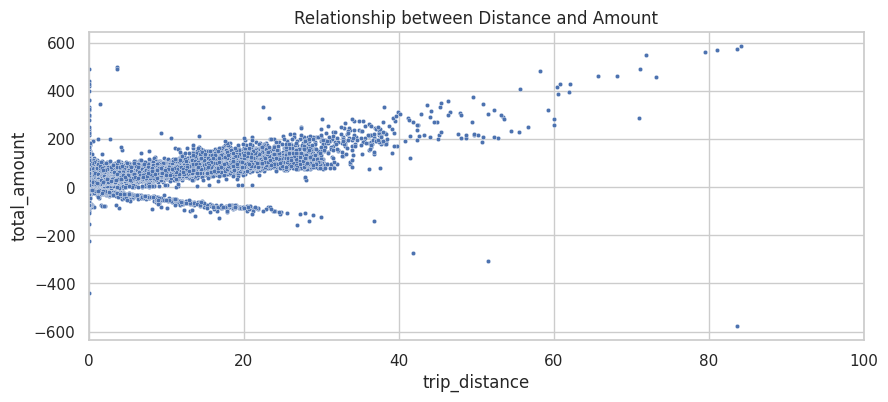

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 4))
sns.scatterplot(x='trip_distance', y='total_amount', data=df2, s=10)
plt.title('Relationship between Distance and Amount')

# Set the x-axis range to be limited to 1000
plt.xlim(0, 100)

# Show the plot
plt.show()


- The general trend show that the total amount increases with increase in distance but there are anomalies.
- trips with negative amount could be refunds.
- There are many trips with negligible (almost 0) distance which have very high fares.

# Feature Interaction

In [22]:
cols = df2[['passenger_count', 'trip_distance', 'RatecodeID', 'extra', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge', 'total_amount', 'Airport_fee', 'PULocationID', 'DOLocationID']]
# cols = df2[['VendorID', 'RatecodeID', 'tip_amount', 'tolls_amount', 'total_amount', 'pickup_weekday', 'pickup_hour', 'pickup_weekday2', 'pickup_hour2', 'trip_duration', 'PULocationID', 'DOLocationID']]

In [23]:
df2.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,pickup_hour,pickup_weekday,pickup_hour2,pickup_weekday2,trip_duration
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,...,0.0,1.0,20.64,2.5,0.0,17,2,16,2,23.240000
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,...,0.0,1.0,25.55,2.5,0.0,23,3,22,3,22.942778
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,...,0.0,1.0,17.64,2.5,0.0,10,4,11,4,0.894167
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,...,0.0,1.0,12.80,2.5,0.0,13,3,14,3,0.947778
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,...,0.0,1.0,18.00,2.5,0.0,22,3,22,3,0.313889


In [24]:
cols.corr()

,passenger_count,trip_distance,RatecodeID,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,total_amount,Airport_fee,PULocationID,DOLocationID
passenger_count,1.000000,0.055253,-0.023628,-0.039732,0.017176,0.042880,-0.002800,-0.002274,0.053378,0.040781,-0.000825,-0.000722
trip_distance,0.055253,1.000000,0.074081,0.150362,0.508322,0.634299,0.006310,-0.268903,0.858963,0.630145,-0.000599,-0.004042
RatecodeID,-0.023628,0.074081,1.000000,-0.070953,-0.032165,0.063736,0.002579,-0.197611,0.055571,-0.004487,-0.001098,-0.000638
extra,-0.039732,0.150362,-0.070953,1.000000,0.160325,0.201275,0.170837,0.068051,0.235014,0.337486,0.001511,0.002938
tip_amount,0.017176,0.508322,-0.032165,0.160325,1.000000,0.411765,0.076438,-0.059399,0.640395,0.335664,0.000754,-0.000253
tolls_amount,0.042880,0.634299,0.063736,0.201275,0.411765,1.000000,0.051194,-0.134240,0.685243,0.437648,-0.000940,-0.002246
improvement_surcharge,-0.002800,0.006310,0.002579,0.170837,0.076438,0.051194,1.000000,0.528659,0.224524,0.083740,-0.000502,-0.002810
congestion_surcharge,-0.002274,-0.268903,-0.197611,0.068051,-0.059399,-0.134240,0.528659,1.000000,-0.147353,-0.335970,0.001219,0.000657
total_amount,0.053378,0.858963,0.055571,0.235014,0.640395,0.685243,0.224524,-0.147353,1.000000,0.598738,0.000547,-0.002943
Airport_fee,0.040781,0.630145,-0.004487,0.337486,0.335664,0.437648,0.083740,-0.335970,0.598738,1.000000,-0.000660,-0.004961


<Axes: >

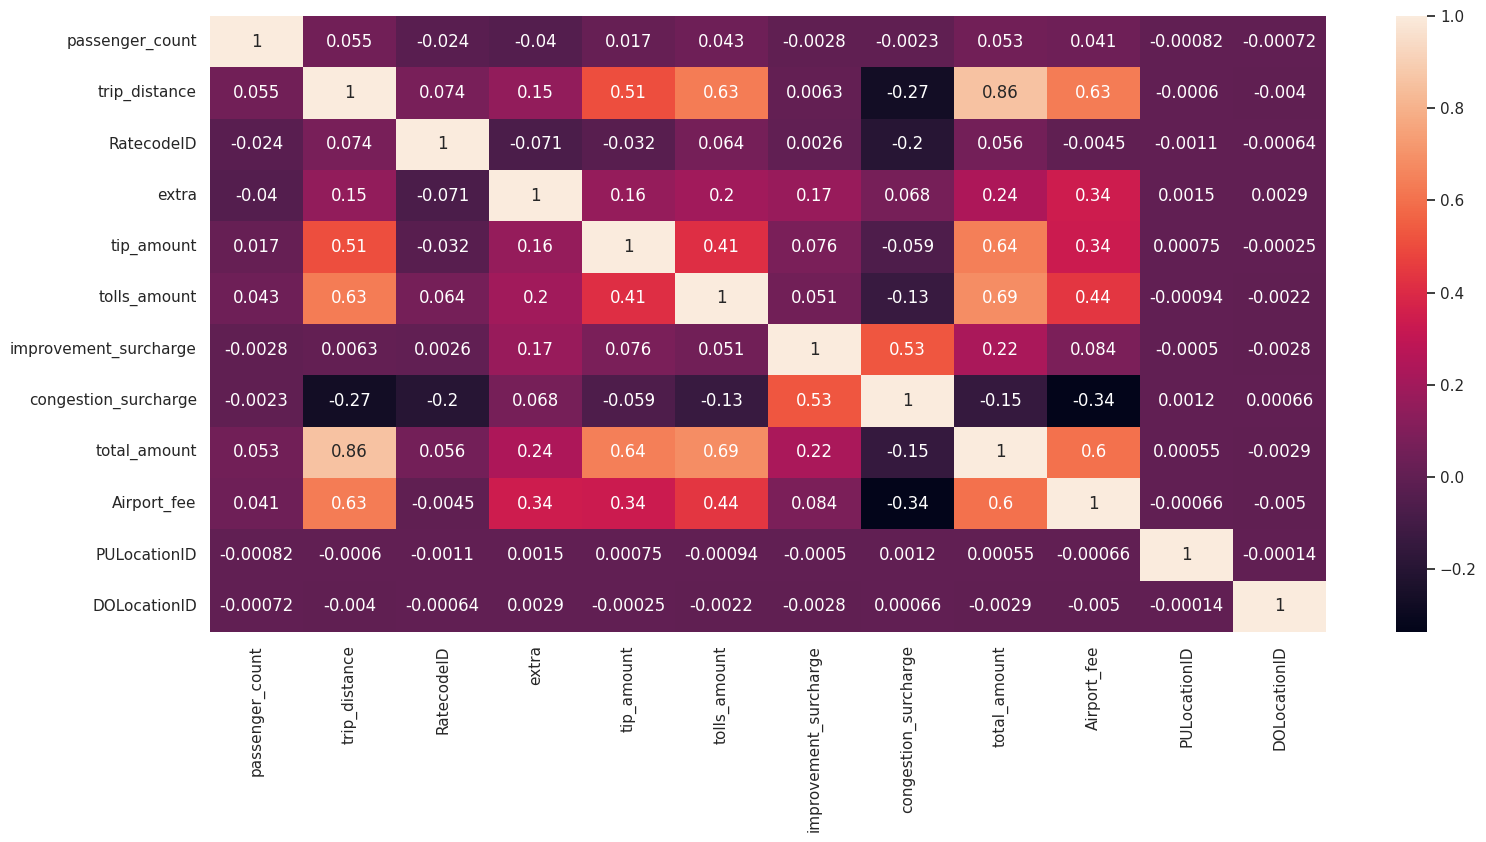

In [25]:
# heatmap to visualize the correlation between variables in the 'cols' DataFrame.
plt.figure(figsize = (18,8))
corr = cols.corr()
sns.heatmap(corr, annot = True)

Weak Correlations: RatecodeID and passenger_count has weak correlations with other variables.

Very Weak Correlation: PULocationID and DOLocationID have very weak correlations with other variables.

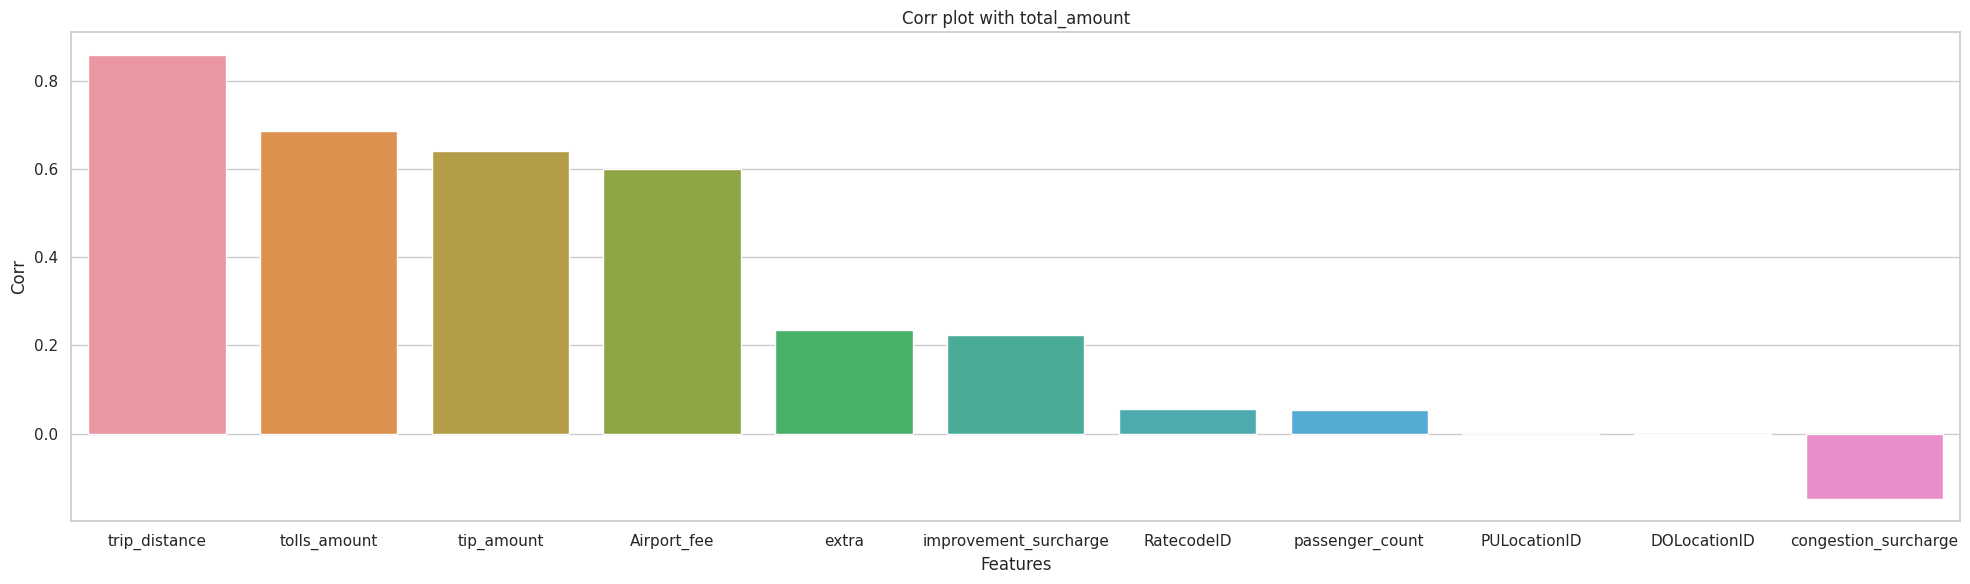

In [26]:
# Visualize the correlation of features with 'total_amount' using a bar plot.
l = cols.loc[:, cols.columns != 'total_amount'].corrwith(cols['total_amount'], axis = 0, method='pearson') 
l = l.sort_values(ascending=False)
plt.figure(figsize = (20,6))
ax = sns.barplot(x=l.index, y=l)
ax.set(xlabel='Features', ylabel='Corr')  
plt.title('Corr plot with total_amount')
plt.tight_layout()
plt.show()

passenger_coutn, PULocationID and DOLocationID isn't correlated with total_amount, So drop these feature from the dataset.trip_distnce is least correralted with total_amount

In [27]:
df = df.drop(['PULocationID', 'DOLocationID'], axis=1)

In [28]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.0
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.0
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.0
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.0
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.0


# Feature Extraction

In [29]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.seconds / 3600
df['trip_duration']

df = df.drop(['tpep_dropoff_datetime', 'tpep_pickup_datetime'], axis=1)

In [30]:
# # df['price_per_mile'] = df['total_amount'] / df['trip_distance']
# df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
# df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
# trip_duration = ((df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.seconds * 60).values

In [31]:
# # Custom transformer class for datetime feature extraction.
# from sklearn.base import BaseEstimator, TransformerMixin
# import pandas as pd
# import numpy as np

# class DatetimeTransformer(BaseEstimator, TransformerMixin):
    
#     def fit(self, X, y=None):
#         return self
    
#     def transform(self, X):
#         X['tpep_pickup_datetime'] = pd.to_datetime(X['tpep_pickup_datetime'])
#         X['tpep_dropoff_datetime'] = pd.to_datetime(X['tpep_dropoff_datetime'])
        
#         pickup_hour = X['tpep_pickup_datetime'].dt.hour.values.reshape(-1, 1)
#         pickup_day_of_week = X['tpep_pickup_datetime'].dt.dayofweek.values.reshape(-1, 1)
#         pickup_month = X['tpep_pickup_datetime'].dt.month.values.reshape(-1, 1)
#         dropoff_hour = X['tpep_dropoff_datetime'].dt.hour.values.reshape(-1, 1)
#         dropoff_day_of_week = X['tpep_dropoff_datetime'].dt.dayofweek.values.reshape(-1, 1)
#         dropoff_month = X['tpep_dropoff_datetime'].dt.month.values.reshape(-1, 1)
#         trip_duration = ((X['tpep_dropoff_datetime'] - X['tpep_pickup_datetime']).dt.seconds / 3600)       
# #       is_weekend_pickup = (X['tpep_pickup_datetime'].dt.dayofweek >= 5).astype(int).values.reshape(-1, 1)
# #         is_weekend_dropoff = (X['tpep_dropoff_datetime'].dt.dayofweek >= 5).astype(int).values.reshape(-1, 1)
#         X['trip_duration'] = trip_duration
#         X = X.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1)
# #         return np.hstack(trip_duration)
# #         return np.hstack((pickup_hour,trip_duration))

# Data Cleaning

In [32]:
df.head()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,trip_duration
0,1,1.0,2.14,1.0,N,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.0,23.240000
1,0,1.0,2.70,1.0,N,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.0,22.942778
2,1,1.0,1.15,1.0,N,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.0,0.894167
3,0,1.0,0.40,1.0,N,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.0,0.947778
4,1,3.0,1.10,1.0,N,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.0,0.313889


In [33]:
df.isnull().sum()

VendorID                    0
passenger_count          6074
trip_distance               0
RatecodeID               6074
store_and_fwd_flag       6074
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     6074
Airport_fee              6074
trip_duration               0
dtype: int64

In [34]:
numerical_features = ['trip_distance', 'extra', 'tip_amount', 'tolls_amount']

categorical_features = ['store_and_fwd_flag', 'payment_type', 'congestion_surcharge', 'improvement_surcharge', 'Airport_fee', 'RatecodeID', 'passenger_count']

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
#         ('datetime', DatetimeTransformer(), ['tpep_pickup_datetime', 'tpep_dropoff_datetime']),
    ])

# Split train and test data

In [36]:
from sklearn.model_selection import train_test_split

X = df.drop('total_amount', axis=1)
y = df['total_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression

lr_model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('model', LinearRegression())])
lr_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['trip_distance', 'extra',
                                                   'tip_amount',
                                                   'tolls_amount']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['store_and_fwd_flag',
                                                   'payment_type',
                                                   'congestion_surcharge',
                                                   'improvement_surcharge',
                                                   'Airport_fee', 'RatecodeID',
                                                   'passenger_count'])])),
                ('model', LinearRegression())])

In [38]:
lr_predict = lr_model.predict(X_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, lr_predict)
mse = mean_squared_error(y_test, lr_predict)
r2 = r2_score(y_test, lr_predict)

print("LR-MAE ", mae)
print("LR-MSE ", mse)
print("LR-R2 ", r2)

LR-MAE  4.144161795964303
LR-MSE  70.1215976798665
LR-R2  0.8921413513710675


In [39]:
from xgboost import XGBRegressor

xgboost_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(objective ='reg:squarederror', random_state=42, n_estimators=85))  # Use reg:squarederror for regression
])

xgboost_model.fit(X_train, y_train)
y_pred = xgboost_model.predict(X_test)
r2_score(y_test, y_pred)

0.9643556671308277

# Ridge Regression

In [40]:
from sklearn.linear_model import Ridge

ridge_model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('model', Ridge())])
ridge_model.fit(X_train, y_train)
ridge_predict = ridge_model.predict(X_test)

In [41]:
mae = mean_absolute_error(y_test, ridge_predict)
mse = mean_squared_error(y_test, ridge_predict)
r2 = r2_score(y_test, ridge_predict)

print("PR-MAE ", mae)
print("PR-MSE ", mse)
print("PR-R2 ", r2)

PR-MAE  4.144259108216904
PR-MSE  70.10140927450513
PR-R2  0.8921724044872585


**Cross Validation on ridge_model**

In [42]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(ridge_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(cv_scores)
cv_scores.mean()

[-82.32646423 -68.82448331 -68.48251806 -72.0391256  -79.78264252]


-74.29104674507072

**Hyperparameter Tuning ridge_model using Grid Search**

In [43]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'model__alpha' : [0.001, 0.01, 0.1, 1, 10, 20, 30]
}

grid_search = GridSearchCV(ridge_model, param_grid, scoring='neg_mean_squared_error', cv= 5)
grid_search.fit(X_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
pred = best_model.predict(X_test)
r2_score(y_test, pred)

Best Hyperparameters: {'model__alpha': 0.1}


0.8921444945594974

# Polynomial Ridge Regression

In [44]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

poly_features = PolynomialFeatures(degree=2, include_bias=False)
pr_model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('poly_features', poly_features),
                        ('model', Ridge())])
pr_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['trip_distance', 'extra',
                                                   'tip_amount',
                                                   'tolls_amount']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['store_and_fwd_flag',
                                                   'payment_type',
                                                   'congestion_surcharge',
                                                   'improvement_surcharge',
                                                   'Airport_fee', 'RatecodeID',
                                                   'passenger_count'])])),
                ('poly_features', PolynomialFeatures(include_bias=False)),
                ('model', Ridge())])

In [45]:
pr_predict = pr_model.predict(X_test)

In [46]:
mae = mean_absolute_error(y_test, pr_predict)
mse = mean_squared_error(y_test, pr_predict)
r2 = r2_score(y_test, pr_predict)

print("PR-MAE ", mae)
print("PR-MSE ", mse)
print("PR-R2 ", r2)

PR-MAE  3.2111072902620763
PR-MSE  35.02398046572986
PR-R2  0.9461273084522944


# KNN

In [47]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', KNeighborsRegressor())])

knn_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['trip_distance', 'extra',
                                                   'tip_amount',
                                                   'tolls_amount']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['store_and_fwd_flag',
                                                   'payment_type',
                                                   'congestion_surcharge',
                                                   'improvement_surcharge',
                                                   'Airport_fee', 'RatecodeID',
                                                   'passenger_count'])])),
                ('model', KNeighborsRegressor())])

In [48]:
knn_predict = knn_model.predict(X_test)

In [49]:
mae = mean_absolute_error(y_test, knn_predict)
mse = mean_squared_error(y_test, knn_predict)
r2 = r2_score(y_test, knn_predict)

print("KNN-MAE ", mae)
print("KNN-MSE ", mse)
print("KNN-R2 ", r2)

KNN-MAE  3.011200685714286
KNN-MSE  38.90822187108571
KNN-R2  0.9401527008735724


# Decision Tree

In [50]:
from sklearn.tree import DecisionTreeRegressor

dt_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeRegressor())
])

dt_model.fit(X_train, y_train)
dt_predict = dt_model.predict(X_test)

In [51]:
mae = mean_absolute_error(y_test, dt_predict)
mse = mean_squared_error(y_test, dt_predict)
r2 = r2_score(y_test, dt_predict)

print("MAE ", mae)
print("MSE ", mse)
print("R2 ", r2)

MAE  3.687552000000001
MSE  56.99994724571429
R2  0.9123246262883083


# Random Forest (Bagging)

In [52]:
from sklearn.ensemble import RandomForestRegressor
rfr_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor())
])

In [53]:
rfr_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['trip_distance', 'extra',
                                                   'tip_amount',
                                                   'tolls_amount']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['store_and_fwd_flag',
                                                   'payment_type',
                                                   'congestion_surcharge',
                                                   'improvement_surcharge',
                                                   'Airport_fee', 'RatecodeID',
                                                   'passenger_count'])])),
                ('model', RandomForestRegressor())])

In [54]:
rfr_predict = rfr_model.predict(X_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, rfr_predict)
mse = mean_squared_error(y_test, rfr_predict)
r2 = r2_score(y_test, rfr_predict)

print("MAE ", mae)
print("MSE ", mse)
print("R2 ", r2)

MAE  2.8615759128571434
MSE  26.393271090188744
R2  0.9594027710879983


# Gradient Boosting

In [55]:
from sklearn.ensemble import GradientBoostingRegressor
boosting_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingRegressor())
])
boosting_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['trip_distance', 'extra',
                                                   'tip_amount',
                                                   'tolls_amount']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['store_and_fwd_flag',
                                                   'payment_type',
                                                   'congestion_surcharge',
                                                   'improvement_surcharge',
                                                   'Airport_fee', 'RatecodeID',
                                                   'passenger_count'])])),
                ('model', GradientBoostingRegressor())])

In [56]:
boosting_predict = boosting_model.predict(X_test)
mae = mean_absolute_error(y_test, boosting_predict)
mse = mean_squared_error(y_test, boosting_predict)
r2 = r2_score(y_test, boosting_predict)

print("MAE ", mae)
print("MSE ", mse)
print("R2 ", r2)

MAE  3.0994917144087872
MSE  31.233138115888746
R2  0.9519582527910968


In [57]:
# from xgboost import XGBRegressor

# xgboost_model = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('model', XGBRegressor(objective ='reg:squarederror', random_state=42, n_estimators=85))  # Use reg:squarederror for regression
# ])

# xgboost_model.fit(X_train, y_train)
# y_pred = xgboost_model.predict(X_test)
# r2_score(y_test, y_pred)

In [58]:
# from xgboost import XGBRegressor

# xgboost_model = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('model', XGBRegressor(objective ='reg:squarederror', random_state=42, n_estimators=85, max_depth=6, learning_rate=0.29))  # Use reg:squarederror for regression
# ])

# xgboost_model.fit(X_train, y_train)
# y_pred = xgboost_model.predict(X_test)
# r2_score(y_test, y_pred)

# Visualizing the R-squared (r2_score) of different models

In [59]:
lr_r2 = r2_score(y_test, lr_predict)
ridge_r2 = r2_score(y_test, ridge_predict)
pr_r2 = r2_score(y_test, pr_predict)
knn_r2 = r2_score(y_test, knn_predict)
dt_r2 = r2_score(y_test, dt_predict)
rfr_r2 = r2_score(y_test, rfr_predict)
boosting_r2 = r2_score(y_test, boosting_predict)

models = ['Linear Reg.', 'Ridge Reg.', 'Polynomial Ridge Reg.', 'KNN', 'Decision Tree', 'Random Forest', 'Gradient Boost']
r2_values = [lr_r2, ridge_r2, pr_r2, knn_r2, dt_r2, rfr_r2,  boosting_r2]

#### Bar plot to compare R-squared scores of different models.

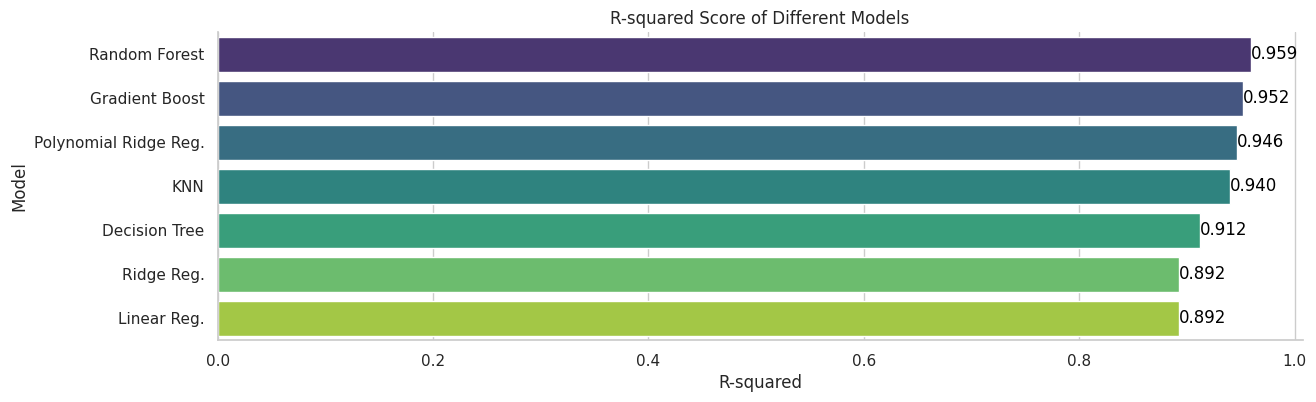

In [60]:
df_r2 = pd.DataFrame({'Model': models, 'R-squared': r2_values})
df_r2 = df_r2.sort_values(by='R-squared', ascending=False)

plt.figure(figsize=(14, 4))
sns.set(style="whitegrid")
ax = sns.barplot(x="R-squared", y="Model", data=df_r2, palette="viridis", )

plt.title("R-squared Score of Different Models")

for i, row in enumerate(df_r2['R-squared']):
    ax.text(row, i, f'{row:.3f}', color='black', va='center')

sns.despine()

plt.show()

In [61]:
df.head()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,trip_duration
0,1,1.0,2.14,1.0,N,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.0,23.240000
1,0,1.0,2.70,1.0,N,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.0,22.942778
2,1,1.0,1.15,1.0,N,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.0,0.894167
3,0,1.0,0.40,1.0,N,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.0,0.947778
4,1,3.0,1.10,1.0,N,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.0,0.313889


# Prediction

In [62]:
df.head()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,trip_duration
0,1,1.0,2.14,1.0,N,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.0,23.240000
1,0,1.0,2.70,1.0,N,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.0,22.942778
2,1,1.0,1.15,1.0,N,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.0,0.894167
3,0,1.0,0.40,1.0,N,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.0,0.947778
4,1,3.0,1.10,1.0,N,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.0,0.313889


In [63]:
test_df = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv')

test_df = test_df.drop(['PULocationID', 'DOLocationID'], axis=1)
test_df['tpep_pickup_datetime'] = pd.to_datetime(test_df['tpep_pickup_datetime'])
test_df['tpep_dropoff_datetime'] = pd.to_datetime(test_df['tpep_dropoff_datetime'])
test_df['trip_duration'] = (test_df['tpep_dropoff_datetime'] - test_df['tpep_pickup_datetime']).dt.seconds / 3600
test_df.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1, inplace=True)

In [64]:
test_df.head(5)


,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,trip_duration
0,1,1.0,4.95,1.0,N,Credit Card,1.0,6.067612,0.0,1.0,2.5,0.0,0.066667
1,1,1.0,2.10,1.0,N,Credit Card,2.5,6.191269,0.0,1.0,2.5,0.0,0.141667
2,1,1.0,0.95,1.0,N,Cash,2.5,3.983872,0.0,1.0,2.5,0.0,1.112222
3,0,1.0,0.80,1.0,N,Credit Card,3.5,6.839341,0.0,1.0,2.5,0.0,0.207500
4,1,1.0,4.01,1.0,N,Cash,0.0,1.468943,0.0,1.0,0.0,0.0,0.473056


In [65]:
predictions = xgboost_model.predict(test_df)
predictions.shape

(50000,)

In [66]:
predictions

array([33.535988, 23.872084, 15.061558, ..., 20.525204, 37.27628 ,
       16.804108], dtype=float32)

In [67]:
submission = pd.DataFrame(columns=['ID', 'total_amount'])
submission['ID'] = [i for i in range(1, 50001)]
submission['total_amount'] = predictions
submission.to_csv('submission.csv', index=False)
submission.shape

(50000, 2)

In [68]:
s = pd.read_csv("/kaggle/working/submission.csv")
s.head()

,ID,total_amount
0,1,33.535988
1,2,23.872084
2,3,15.061558
3,4,14.453292
4,5,24.523441
